In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Example: CSV file containing data
data = pd.read_csv('home.csv')

# Inspect the dataset
print(data.head())


   size  bedrooms  age  location   price
0  1200         3   10     Urban  240000
1  1500         4    5     Urban  310000
2   800         2   20  Suburban  120000
3   950         2   15  Suburban  150000
4  1800         4    5     Urban  350000


In [5]:
# Drop missing values
data = data.dropna()

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['location'], drop_first=True)

# Separate features and target
X = data.drop('price', axis=1)  # Features
y = data['price']              # Target variable


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)
print("Prediction: ", y_pred, "\n")

Prediction:  [146277.8406946  303763.68440921] 



In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")


Mean Squared Error: 1090265085.751431
R-Squared Value: 0.9011097427889858


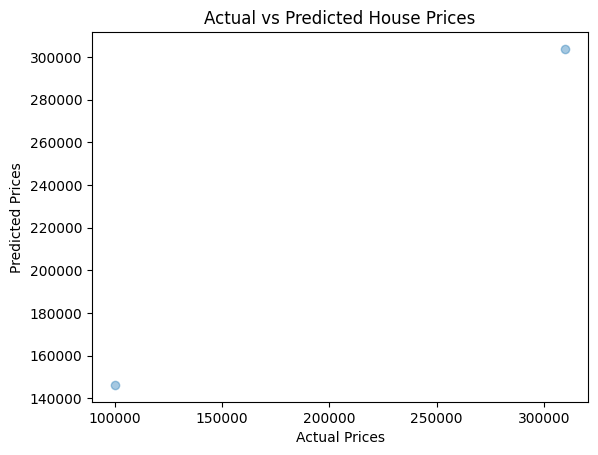

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
